Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Могу предложить обратить внимание на вот этот курс: https://vk.com/dlschool_mipt

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что проект хорошо структурирован. Приятно проверять такие работы.
* Я оставил несколько советов. Пожалуйста, обрати на них внимание.
* Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Удачи в дальнейшем обучении и следующих работах!

# Определение возраста покупателей

## Исследовательский анализ данных

Импортируем необходимые библиотеки.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

Загрузим файл с разметкой.

In [14]:
labels = pd.read_csv('/datasets/faces/labels.csv')

Посмотрим на него.

In [15]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [16]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


В нашем распоряжении 7591 файл.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что не забываешь про первичный осмотр загруженного файла!
</div>

Посмотрим на распределение возраста.

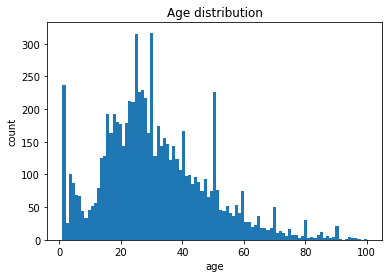

In [17]:
plt.hist(labels['real_age'], bins=labels['real_age'].nunique())
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age distribution')
plt.show()

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошая визуализация!
</div>

Распределение отчасти напоминает нормальное, однако оно слегка скошено вправо, а также стоит отметить, что есть мощный узкий пик для младенцев. Наиболее представленными в выборке являются люди в возрасте около 30 лет.

In [18]:
labels['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

Среднее значение возраста в выборке - 31. Медианное - 29.

Создадим генератор изображений.

In [19]:
datagen = ImageDataGenerator(rescale=1/255., validation_split=0.25)

Загрузим изображения.

In [20]:
train_datagen_flow = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files',
    x_col='file_name',
    y_col='real_age',
    subset='training',
    batch_size=16,
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(224,224)
)

Found 5694 validated image filenames.


Выделим фичи и целевой признак.

In [21]:
features, age = next(train_datagen_flow)

Посмотрим на первые 16 фотографий, выведя их совместно с возрастом.

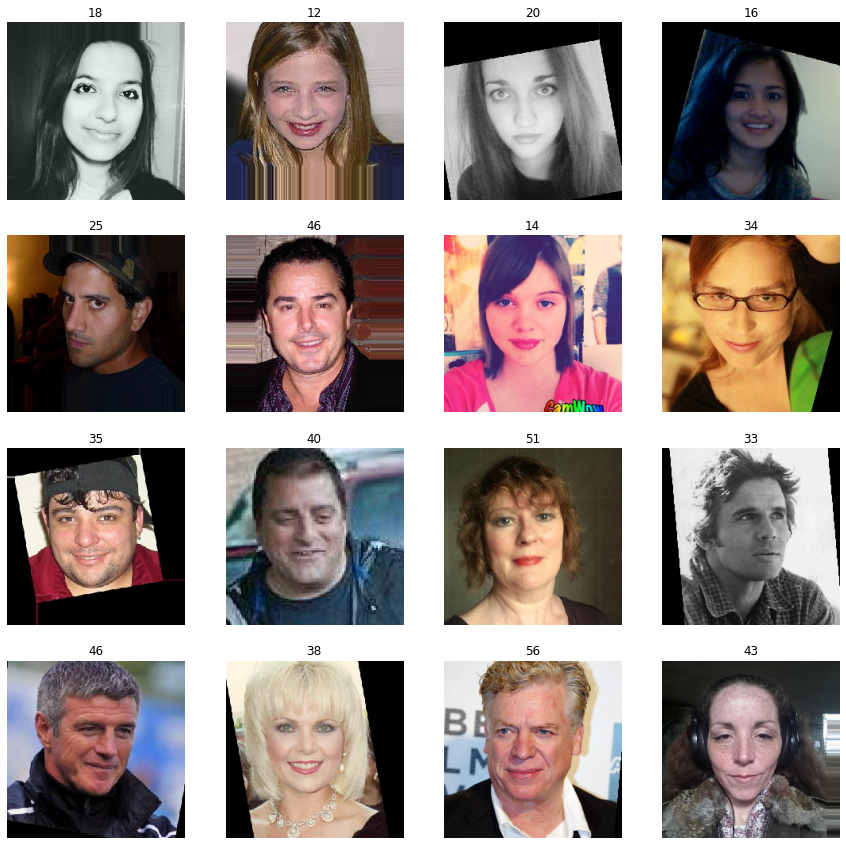

In [22]:
plt.figure(figsize=(15, 15))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(features[i])
    plt.title(age[i])
    plt.axis('off')

**Вывод**:
1. В нашем распоряжении 7591 фотография разных людей в возрасте от 1 до 100 лет.
2. Распределение возраста похоже на нормальное, однако оно слегка скошено вправо, а также есть мощный узкий пик для младенцев. 
3. Среднее значение возраста - 31 год, медианное - 29 лет.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что в названиях изображений указан возраст.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Анализ проведен хорошо.
</div>

## Обучение модели

Модель создадим с нуля, взяв принципы от модели VGG, где все фильтры имеют размер 3х3, а также слои свертки могут идти друг за другом. Использование более сложных архитектур может привести к переобучению.

Для увеличения обучающей выборки воспользуемся горизонтальным отражением.

Функция потерь - MSE. Интересующая нас метрика - MAE.

Обучать модель будем в течение 150 эпох, однако если метрика на валидации не будет улучшаться в течение 15 эпох, обучение будет прервано.

```python

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255,
        horizontal_flip=True)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=42)

    return train_gen_flow


def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=42)

    return test_gen_flow


def create_model(input_shape):
    model = Sequential()

    model.add(Conv2D(filters=50, kernel_size=3, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=50, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=2, strides=2))

    model.add(Conv2D(filters=100, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=100, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=2, strides=2))

    model.add(Conv2D(filters=200, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=200, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=2, strides=2))

    model.add(Conv2D(filters=200, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=2, strides=2))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='relu'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse',
                  metrics=['mae'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=150, steps_per_epoch=None, validation_steps=None):
    earlystopping_cb = EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=15,
        verbose=0,
        mode='auto',
        baseline=None,
        restore_best_weights=True 
    )

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        callbacks=[earlystopping_cb],
        verbose=2,
        shuffle=True
    )

    return model

```

```

Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.

Train for 356 steps, validate for 119 steps
Epoch 1/150
356/356 - 41s - loss: 772.0984 - mae: 22.3951 - val_loss: 476.7311 - val_mae: 16.8271
Epoch 2/150
356/356 - 38s - loss: 436.1596 - mae: 15.9220 - val_loss: 242.1214 - val_mae: 12.1845
Epoch 3/150
356/356 - 37s - loss: 251.9459 - mae: 12.1452 - val_loss: 213.1620 - val_mae: 11.2078
Epoch 4/150
356/356 - 37s - loss: 209.0873 - mae: 11.0884 - val_loss: 269.7676 - val_mae: 12.8972
Epoch 5/150
356/356 - 38s - loss: 186.1850 - mae: 10.5080 - val_loss: 185.5779 - val_mae: 10.6612
Epoch 6/150
356/356 - 37s - loss: 163.6909 - mae: 9.8583 - val_loss: 281.1416 - val_mae: 13.7194
Epoch 7/150
356/356 - 37s - loss: 149.7816 - mae: 9.4356 - val_loss: 149.0541 - val_mae: 9.6098
Epoch 8/150
356/356 - 37s - loss: 133.6727 - mae: 8.9617 - val_loss: 204.9146 - val_mae: 10.9080
Epoch 9/150
356/356 - 37s - loss: 117.8384 - mae: 8.4515 - val_loss: 167.9259 - val_mae: 10.2926
Epoch 10/150
356/356 - 38s - loss: 101.6550 - mae: 7.7456 - val_loss: 146.3083 - val_mae: 9.6048
Epoch 11/150
356/356 - 37s - loss: 90.9902 - mae: 7.3737 - val_loss: 139.9560 - val_mae: 9.4948
Epoch 12/150
356/356 - 37s - loss: 78.5107 - mae: 6.8629 - val_loss: 142.5897 - val_mae: 9.1204
Epoch 13/150
356/356 - 38s - loss: 72.7257 - mae: 6.6059 - val_loss: 135.5083 - val_mae: 9.2232
Epoch 14/150
356/356 - 37s - loss: 61.9568 - mae: 6.0902 - val_loss: 138.1587 - val_mae: 9.2562
Epoch 15/150
356/356 - 38s - loss: 55.0411 - mae: 5.7574 - val_loss: 128.9009 - val_mae: 8.7321
Epoch 16/150
356/356 - 38s - loss: 51.2730 - mae: 5.5557 - val_loss: 132.1307 - val_mae: 9.0045
Epoch 17/150
356/356 - 38s - loss: 47.6400 - mae: 5.4129 - val_loss: 135.7658 - val_mae: 9.1750
Epoch 18/150
356/356 - 37s - loss: 44.8659 - mae: 5.2243 - val_loss: 132.0003 - val_mae: 8.7533
Epoch 19/150
356/356 - 38s - loss: 42.0820 - mae: 5.0855 - val_loss: 139.6344 - val_mae: 9.3956
Epoch 20/150
356/356 - 38s - loss: 40.8621 - mae: 5.0302 - val_loss: 124.1950 - val_mae: 8.6556
Epoch 21/150
356/356 - 37s - loss: 39.2894 - mae: 4.9186 - val_loss: 122.4472 - val_mae: 8.5351
Epoch 22/150
356/356 - 37s - loss: 38.9079 - mae: 4.9108 - val_loss: 130.7525 - val_mae: 8.8903
Epoch 23/150
356/356 - 37s - loss: 38.2911 - mae: 4.8289 - val_loss: 122.8540 - val_mae: 8.6373
Epoch 24/150
356/356 - 38s - loss: 34.6589 - mae: 4.6105 - val_loss: 121.4362 - val_mae: 8.5979
Epoch 25/150
356/356 - 38s - loss: 34.6690 - mae: 4.6257 - val_loss: 123.5904 - val_mae: 8.6044
Epoch 26/150
356/356 - 38s - loss: 33.7542 - mae: 4.5842 - val_loss: 124.0031 - val_mae: 8.6821
Epoch 27/150
356/356 - 38s - loss: 33.8211 - mae: 4.5422 - val_loss: 120.6139 - val_mae: 8.4394
Epoch 28/150
356/356 - 37s - loss: 32.6599 - mae: 4.4940 - val_loss: 124.5159 - val_mae: 8.6620
Epoch 29/150
356/356 - 38s - loss: 32.5084 - mae: 4.4736 - val_loss: 117.0069 - val_mae: 8.4402
Epoch 30/150
356/356 - 37s - loss: 31.2411 - mae: 4.3859 - val_loss: 120.5123 - val_mae: 8.3657
Epoch 31/150
356/356 - 37s - loss: 32.0686 - mae: 4.4590 - val_loss: 118.5611 - val_mae: 8.3867
Epoch 32/150
356/356 - 37s - loss: 31.3653 - mae: 4.3981 - val_loss: 119.3782 - val_mae: 8.3584
Epoch 33/150
356/356 - 37s - loss: 30.6605 - mae: 4.3735 - val_loss: 117.2184 - val_mae: 8.3818
Epoch 34/150
356/356 - 38s - loss: 29.0534 - mae: 4.2587 - val_loss: 116.9189 - val_mae: 8.3564
Epoch 35/150
356/356 - 38s - loss: 29.3758 - mae: 4.2740 - val_loss: 131.8779 - val_mae: 9.0810
Epoch 36/150
356/356 - 37s - loss: 29.0953 - mae: 4.2613 - val_loss: 120.5180 - val_mae: 8.3679
Epoch 37/150
356/356 - 37s - loss: 28.2624 - mae: 4.1873 - val_loss: 116.1815 - val_mae: 8.3060
Epoch 38/150
356/356 - 38s - loss: 27.8575 - mae: 4.1551 - val_loss: 113.7310 - val_mae: 8.2594
Epoch 39/150
356/356 - 37s - loss: 26.4706 - mae: 4.0670 - val_loss: 122.8495 - val_mae: 8.6368
Epoch 40/150
356/356 - 38s - loss: 26.3316 - mae: 4.0590 - val_loss: 123.4377 - val_mae: 8.6604
Epoch 41/150
356/356 - 38s - loss: 27.1384 - mae: 4.0904 - val_loss: 114.2076 - val_mae: 8.2961
Epoch 42/150
356/356 - 38s - loss: 26.4544 - mae: 4.0312 - val_loss: 121.5126 - val_mae: 8.6479
Epoch 43/150
356/356 - 38s - loss: 26.9076 - mae: 4.0744 - val_loss: 113.4925 - val_mae: 8.1680
Epoch 44/150
356/356 - 38s - loss: 25.9328 - mae: 4.0248 - val_loss: 115.9580 - val_mae: 8.3559
Epoch 45/150
356/356 - 37s - loss: 24.9834 - mae: 3.9100 - val_loss: 116.1559 - val_mae: 8.2795
Epoch 46/150
356/356 - 37s - loss: 25.5730 - mae: 4.0008 - val_loss: 125.6768 - val_mae: 8.7953
Epoch 47/150
356/356 - 37s - loss: 24.4466 - mae: 3.8929 - val_loss: 122.0560 - val_mae: 8.6798
Epoch 48/150
356/356 - 38s - loss: 24.4609 - mae: 3.8972 - val_loss: 129.5630 - val_mae: 8.9813
Epoch 49/150
356/356 - 38s - loss: 24.6920 - mae: 3.9069 - val_loss: 119.6073 - val_mae: 8.5597
Epoch 50/150
356/356 - 37s - loss: 23.0778 - mae: 3.7787 - val_loss: 113.7156 - val_mae: 8.1584
Epoch 51/150
356/356 - 37s - loss: 23.2715 - mae: 3.8172 - val_loss: 115.0232 - val_mae: 8.2638
Epoch 52/150
356/356 - 37s - loss: 23.4773 - mae: 3.8319 - val_loss: 118.7487 - val_mae: 8.5141
Epoch 53/150
356/356 - 37s - loss: 23.4407 - mae: 3.8080 - val_loss: 117.6387 - val_mae: 8.4424
Epoch 54/150
356/356 - 38s - loss: 22.8173 - mae: 3.7746 - val_loss: 112.6620 - val_mae: 8.1797
Epoch 55/150
356/356 - 38s - loss: 22.4442 - mae: 3.7297 - val_loss: 113.5127 - val_mae: 8.1684
Epoch 56/150
356/356 - 37s - loss: 22.4363 - mae: 3.6900 - val_loss: 114.7886 - val_mae: 8.1872
Epoch 57/150
356/356 - 38s - loss: 22.4124 - mae: 3.7388 - val_loss: 113.8983 - val_mae: 8.2545
Epoch 58/150
356/356 - 37s - loss: 20.9643 - mae: 3.6090 - val_loss: 113.5910 - val_mae: 8.3052
Epoch 59/150
356/356 - 38s - loss: 21.6812 - mae: 3.6748 - val_loss: 115.7068 - val_mae: 8.3497
Epoch 60/150
356/356 - 37s - loss: 21.2007 - mae: 3.6306 - val_loss: 117.1932 - val_mae: 8.2173
Epoch 61/150
356/356 - 38s - loss: 20.7197 - mae: 3.5947 - val_loss: 115.1634 - val_mae: 8.2490
Epoch 62/150
356/356 - 37s - loss: 20.7609 - mae: 3.5850 - val_loss: 112.6572 - val_mae: 8.1634
Epoch 63/150
356/356 - 37s - loss: 20.2693 - mae: 3.5387 - val_loss: 126.9484 - val_mae: 8.8403
Epoch 64/150
356/356 - 37s - loss: 20.1398 - mae: 3.5351 - val_loss: 113.2246 - val_mae: 8.2304
Epoch 65/150
356/356 - 37s - loss: 20.1239 - mae: 3.5091 - val_loss: 122.0130 - val_mae: 8.6204
Epoch 66/150
356/356 - 38s - loss: 19.6458 - mae: 3.4620 - val_loss: 113.0488 - val_mae: 8.1961
Epoch 67/150
356/356 - 38s - loss: 19.6487 - mae: 3.4803 - val_loss: 112.5047 - val_mae: 8.1303
Epoch 68/150
356/356 - 37s - loss: 19.6924 - mae: 3.4728 - val_loss: 122.2307 - val_mae: 8.5782
Epoch 69/150
356/356 - 38s - loss: 19.2104 - mae: 3.4344 - val_loss: 115.2106 - val_mae: 8.3303
Epoch 70/150
356/356 - 38s - loss: 19.3582 - mae: 3.4713 - val_loss: 111.5993 - val_mae: 8.1905
Epoch 71/150
356/356 - 38s - loss: 19.3595 - mae: 3.4552 - val_loss: 110.5335 - val_mae: 8.0598
Epoch 72/150
356/356 - 37s - loss: 18.9796 - mae: 3.4059 - val_loss: 115.6557 - val_mae: 8.1753
Epoch 73/150
356/356 - 38s - loss: 18.7764 - mae: 3.3965 - val_loss: 111.5944 - val_mae: 8.1318
Epoch 74/150
356/356 - 38s - loss: 17.7365 - mae: 3.3323 - val_loss: 115.6319 - val_mae: 8.3737
Epoch 75/150
356/356 - 37s - loss: 18.1738 - mae: 3.3561 - val_loss: 130.1510 - val_mae: 9.0131
Epoch 76/150
356/356 - 38s - loss: 17.8942 - mae: 3.3144 - val_loss: 113.3237 - val_mae: 8.1279
Epoch 77/150
356/356 - 37s - loss: 18.3111 - mae: 3.3508 - val_loss: 112.0034 - val_mae: 8.1756
Epoch 78/150
356/356 - 38s - loss: 17.7498 - mae: 3.2932 - val_loss: 114.2088 - val_mae: 8.2281
Epoch 79/150
356/356 - 38s - loss: 17.5020 - mae: 3.2480 - val_loss: 114.5274 - val_mae: 8.3764
Epoch 80/150
356/356 - 38s - loss: 17.2839 - mae: 3.2465 - val_loss: 106.5395 - val_mae: 7.9755
Epoch 81/150
356/356 - 37s - loss: 17.1284 - mae: 3.2458 - val_loss: 109.7450 - val_mae: 8.0281
Epoch 82/150
356/356 - 37s - loss: 17.3526 - mae: 3.2587 - val_loss: 110.0911 - val_mae: 8.0707
Epoch 83/150
356/356 - 38s - loss: 17.1064 - mae: 3.2450 - val_loss: 113.4817 - val_mae: 8.1199
Epoch 84/150
356/356 - 38s - loss: 17.3286 - mae: 3.2530 - val_loss: 114.2821 - val_mae: 8.3318
Epoch 85/150
356/356 - 37s - loss: 16.9432 - mae: 3.2336 - val_loss: 115.8430 - val_mae: 8.2821
Epoch 86/150
356/356 - 37s - loss: 17.1073 - mae: 3.2464 - val_loss: 113.2937 - val_mae: 8.2095
Epoch 87/150
356/356 - 37s - loss: 16.4772 - mae: 3.1857 - val_loss: 113.9730 - val_mae: 8.2998
Epoch 88/150
356/356 - 37s - loss: 16.7580 - mae: 3.2013 - val_loss: 111.3414 - val_mae: 8.1487
Epoch 89/150
356/356 - 37s - loss: 15.9000 - mae: 3.1384 - val_loss: 116.7215 - val_mae: 8.4183
Epoch 90/150
356/356 - 37s - loss: 16.5521 - mae: 3.1854 - val_loss: 111.8907 - val_mae: 8.0510
Epoch 91/150
356/356 - 37s - loss: 15.5720 - mae: 3.1025 - val_loss: 106.9515 - val_mae: 7.9172
Epoch 92/150
356/356 - 37s - loss: 16.1078 - mae: 3.1537 - val_loss: 112.0394 - val_mae: 8.2030
Epoch 93/150
356/356 - 37s - loss: 16.3511 - mae: 3.1645 - val_loss: 112.2042 - val_mae: 8.0975
Epoch 94/150
356/356 - 37s - loss: 16.0016 - mae: 3.1146 - val_loss: 122.4565 - val_mae: 8.7162
Epoch 95/150
356/356 - 37s - loss: 15.3489 - mae: 3.0816 - val_loss: 107.5444 - val_mae: 8.0105
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 9s - loss: 106.5395 - mae: 7.9755
Test MAE: 7.9755

```

<div class="alert alert-block alert-success">
<b>Успех:</b> Модель определена верно. Отлично, что аугментация была применнеа только к треину.
</div>

## Анализ обученной модели

Сначала проведем анализ модели на адекватность.

Выделим обучающую и тестовую выборки.

In [28]:
X_train, X_val, y_train, y_val = train_test_split(labels['file_name'], labels['real_age'], test_size=0.25, random_state=42)

Создадим константные модели, предсказывающие медианное и среднее значение, и оценим целевую метрику.

In [29]:
mean_reg = DummyRegressor(strategy='mean')
mean_reg.fit(X_train, y_train)
mean_absolute_error(y_val, mean_reg.predict(X_val))

13.192530175430347

In [30]:
median_reg = DummyRegressor(strategy='median')
median_reg.fit(X_train, y_train)
mean_absolute_error(y_val, median_reg.predict(X_val))

12.943624868282402

В обоих случах МАЕ значительно хуже МАЕ, полученной с помощью глубокой нейросети.

**Выводы:**
- Обучение модели было прервано на 95 эпохе. 
- Стоит отметить, что присутствует переобучение, однако требуемое значение целевой метрики было достигнуто.
- Для улучшения ситуации с переобучением возможно стоит снизить сложность модели (например уменьшить количество слоев), однако в таком случае мы рискуем попасть в ситуацию, когда модель будет не спосбна распознавать паттерны в изображениях.
- Модель адекватная. Значение метрики МАЕ константных моделей значительно хуже.

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта!
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Можно было еще сказать несколько слов о бизнесе. Позволяет ли полученная модель решить поставленные бизнесом задачи?
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы